In [1]:
# import python libraries

import matplotlib.pyplot as plt
import os
import pandas as pd
import requests
import sys
import xarray as xr
import scipy
from scipy import interpolate
from matplotlib.dates import DateFormatter
from time import sleep
import numpy as np

In [2]:
begindate = '20190917' # data is avail. beginning 20180917
enddate = '20190922'

Select Input Parameters

In [3]:
#Generating inflow for channel 1
comid_all = ['1475119','1475125','1475121','1475141']
inflow1 = pd.DataFrame()
totalinflow = pd.DataFrame()
outflow1 = pd.DataFrame()
totaloutflow = pd.DataFrame()
len(comid_all)
for i in range(len(comid_all)):
    comid = comid_all[i]
    input1 = pd.read_csv('D:/Sujana/Project/ce397/csv_project/'+str(comid)+'.csv')
    inflow1['Time'] = input1['Time']
    inflow1[i] = input1['Total_inflow']
    outflow1[i] = input1['Discharge_NWM(m3/s)']
    
inflow1['Total_inflow'] = inflow1[0]+inflow1[1]+inflow1[2]+inflow1[3]
outflow1['Outflow1'] = outflow1[3]
headerlist = ['Time','1475119','1475125','1475121','1475141','Total_inflow']
totalinflow['Time'] = inflow1['Time']
totalinflow['Inflow_1'] = inflow1['Total_inflow']
totaloutflow['Time'] = inflow1['Time']
totaloutflow['Outflow1'] = outflow1['Outflow1'] 
inflow1.to_csv(r'D:/Sujana/Project/ce397/csv_project/Inflow1.csv', header=headerlist)



In [4]:
#Generating inflow for channel 2
comid_all2 = ['1475151','1475149']
inflow2 = pd.DataFrame()
outflow2 = pd.DataFrame()
len(comid_all2)
for i in range(len(comid_all2)):
    comid = comid_all2[i]
    input2 = pd.read_csv('D:/Sujana/Project/ce397/csv_project/'+str(comid)+'.csv')
    inflow2['Time'] = input1['Time']
    inflow2[i] = input2['Total_inflow']
    outflow2[i] = input1['Discharge_NWM(m3/s)']
    
inflow2['Total_inflow'] = inflow2[0]+inflow2[1]
outflow2['Outflow2'] = outflow2[0]+outflow2[1]
headerlist = ['Time','1475151','147149','Total_inflow']
totalinflow['Inflow_2'] = inflow2['Total_inflow']
totaloutflow['Outflow2'] = outflow2['Outflow2']
inflow2.to_csv(r'D:/Sujana/Project/ce397/csv_project/Inflow2.csv', header=headerlist)

In [5]:
#Generating inflow for channel 3
comid = 1475173
inflow3 = pd.DataFrame()
input3 = pd.read_csv('D:/Sujana/Project/ce397/csv_project/'+str(comid)+'.csv')
inflow3['Time'] = input3['Time']
inflow3['Total_inflow'] = input3['Total_inflow']
inflow3['Outflow3'] = input3['Discharge_NWM(m3/s)']
totalinflow['Inflow_3'] = inflow3['Total_inflow']
totaloutflow['Outflow3'] = inflow3['Outflow3']
inflow3.to_csv(r'D:/Sujana/Project/ce397/csv_project/Inflow3.csv')
totalinflow.to_csv(r'D:/Sujana/Project/ce397/csv_project/Total_inflow.csv')
totaloutflow.to_csv(r'D:/Sujana/Project/ce397/csv_project/Total_Discharge_nwm.csv')

Creating 15 min time series and interpolating data

In [6]:
def interpolation(x, y, xnew):
    interp_fun = interpolate.interp1d(x, y, fill_value='extrapolate')
    y_interp = interp_fun(xnew)
    return(y_interp)

In [7]:
new_flow = pd.DataFrame()
series = pd.date_range(start='2019-09-17', end='2019-09-22', freq='15 min')
new_flow['Time'] = series
series = [x.timestamp() for x in series]   #Converts time to seconds for interpolation
x = pd.to_datetime(totalinflow['Time'])
x = [var.timestamp() for var in x]
xnew = series
I1 = interpolation(x,totalinflow['Inflow_1'],xnew)
I2 = interpolation(x,totalinflow['Inflow_2'],xnew)
I3 = interpolation(x,totalinflow['Inflow_3'],xnew)
O1 = interpolation(x,totaloutflow['Outflow1'],xnew)
O2 = interpolation(x,totaloutflow['Outflow2'],xnew)
O3 = interpolation(x,totaloutflow['Outflow3'],xnew)


new_flow['Inflow1_15min'] = I1
new_flow['Inflow2_15min'] = I2
new_flow['Inflow3_15min'] = I3
new_flow['Outflow1_15min'] = O1
new_flow['Outflow2_15min'] = O2
new_flow['Outflow3_15min'] = O3

new_flow.to_csv(r'D:/Sujana/Project/ce397/time_interval_15min/15min_flow.csv')


In [8]:
K1 = 7.722
X1 = 0 #-7.2 
delta_t = 15*60
alpha1 = (delta_t-2*K1*X1)/(2*K1*(1-X1)+delta_t)
beta1 = (delta_t+2*K1*X1)/(2*K1*(1-X1)+delta_t)
xi1 = (2*K1*(1-X1)-delta_t)/(2*K1*(1-X1)+delta_t)

K2 = 7.697 #7.3317
X2 = 0
delta_t = 15*60
alpha2 = (delta_t-2*K2*X2)/(2*K2*(1-X2)+delta_t)
beta2 = (delta_t+2*K1*X1)/(2*K2*(1-X2)+delta_t)
xi2 = (2*K2*(1-X1)-delta_t)/(2*K2*(1-X2)+delta_t)

K3 = 7.722
X3 = 0
delta_t = 15*60
alpha3 = (delta_t-2*K2*X2)/(2*K2*(1-X2)+delta_t)
beta3 = (delta_t+2*K2*X2)/(2*K2*(1-X2)+delta_t)
xi3 = (2*K2*(1-X2)-delta_t)/(2*K2*(1-X2)+delta_t)






In [9]:
#Define the matrices
import numpy as np
import pandas as pd
B_I = np.array([0,0,0,0,0,0,beta1,beta2,0]).reshape(3,3)
X_I = np.array([0,0,0,0,0,0,xi1,xi2,0]).reshape(3,3)
B_O = np.array([beta1,0,0,0,beta2,0,alpha3*beta1,alpha3*beta2,beta3]).reshape(3,3)
X_O = np.array([xi1,0,0,0,xi2,0,alpha3*xi1,alpha3*xi2,xi3]).reshape(3,3)
P_I = np.array([1,0,0,0,1,0,alpha1,alpha2,1]).reshape(3,3)
P_O = np.array([alpha1,0,0,0,alpha2,0,alpha3*alpha1,alpha3*alpha2,alpha3]).reshape(3,3)

In [10]:
df = pd.read_csv('time_interval_15min/15min_flow.csv')

mat_6x6 = np.block([[B_I,X_I],[B_O,X_O]])  # Creating 6x6 Matrix

mat_6x3 = np.block([[P_I],[P_O]])        # Creating 6 * 3 matrix

I_intial=np.array([0,0,0]).reshape(3,1)  # Intializing I matrix

O_intial=np.array([0,0,0]).reshape(3,1)    # Initializing O matrix

IO_mat_6x1 = np.block([[I_intial],[O_intial]])  # Creating a block matrix

In [11]:
P1 = np.array(df['Inflow1_15min'])
P2 = np.array(df['Inflow2_15min'])
P3 = np.array(df['Inflow3_15min'])
time = df['Time']



result = IO_mat_6x1.reshape(1,6) # Initialing result with initial value for Input and output

for idx in range(len(P1)):   # running till the length of P1 i.e. the number of time steps
    P_t = np.array([[P1[idx]],[P2[idx]],[P3[idx]]])   # extracting value of each arrary for each time step
    val = mat_6x6@result[-1,:].reshape(6,1)+mat_6x3@P_t    # selecting the last value of result and reshaping it to 6x1
    val = val.reshape(1,6)
    result = np.concatenate((result,val),axis=0)    # each row result for each time step
# np.savetxt('time_interval_15min/result_outflow.csv', result, delimiter=",")

Save the Modeled Outflows as CSV

In [12]:
new_result = pd.DataFrame()
new_result['Time'] = df['Time']
new_result['Model_I1'] = result[1:,0]
new_result['Model_I2'] = result[1:,1]
new_result['Model_I3'] = result[1:,2]
new_result['Model_O1'] = result[1:,3]
new_result['Model_O2'] = result[1:,4]
new_result['Model_O3'] = result[1:,5]
new_result.to_csv('D:/Sujana/Project/ce397/time_interval_15min/15min_modelflow.csv')


In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms1 = np.sqrt(mean_squared_error(new_result['Model_O1'], df['Outflow1_15min']))
rms2 = np.sqrt(mean_squared_error(new_result['Model_O2'], df['Outflow2_15min']))
rms3 = np.sqrt(mean_squared_error(new_result['Model_O3'], df['Outflow3_15min']))


<Figure size 432x288 with 0 Axes>

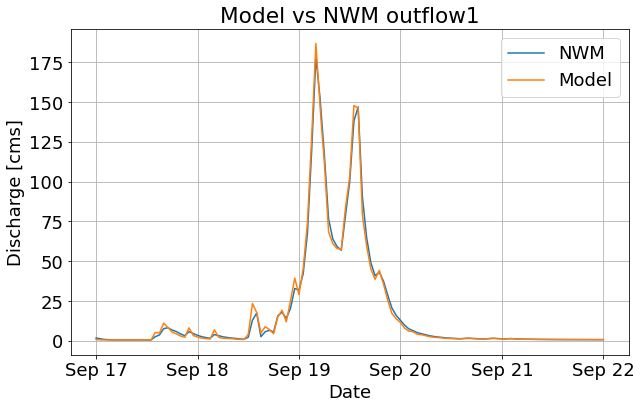

<Figure size 432x288 with 0 Axes>

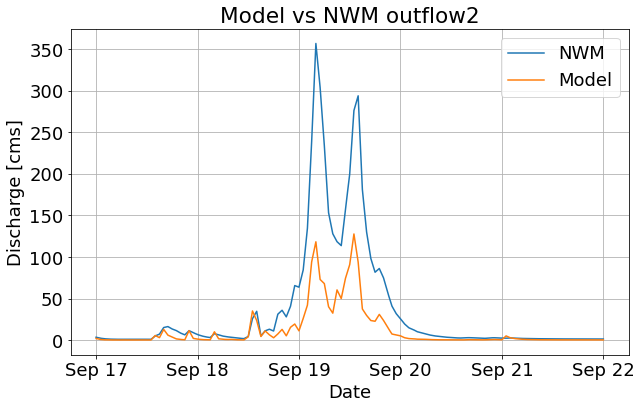

<Figure size 432x288 with 0 Axes>

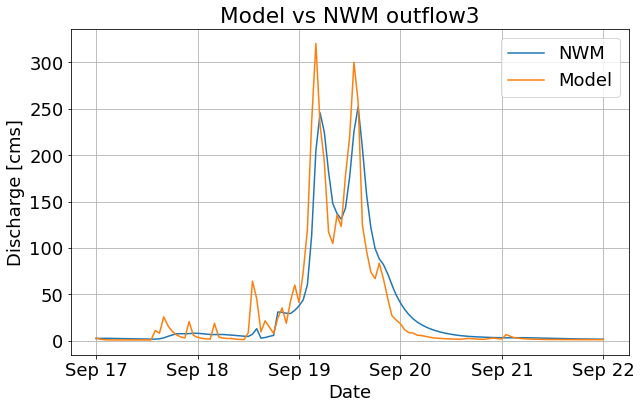

In [130]:
# plot the discharge time series
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

time= pd.to_datetime(time)

# Outflow1
plt.figure(facecolor='white')
plt.rc('font', size=18)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(time, df['Outflow1_15min'], label='NWM')
ax.plot(time, result[1:,3], label='Model')
ax.set(xlabel='Date',
       ylabel='Discharge [cms]',
       title='Model vs NWM outflow1')
date_form = DateFormatter("%b %d")
ax.xaxis.set_major_formatter(date_form)
ax.legend()
ax.grid(True)
# plt.show()
plt.savefig('time_interval_15min/Model vs NWM outflow1.jpg')

# Outflow2
plt.figure(facecolor='white')
plt.rc('font', size=18)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(time, df['Outflow2_15min'], label='NWM')
ax.plot(time, result[1:,4], label='Model')
ax.set(xlabel='Date',
       ylabel='Discharge [cms]',
       title='Model vs NWM outflow2')
date_form = DateFormatter("%b %d")
ax.xaxis.set_major_formatter(date_form)
ax.legend()
ax.grid(True)
# plt.show()
plt.savefig('time_interval_15min/Model vs NWM outflow2.jpg')

# Outflow2
plt.figure(facecolor='white')
plt.rc('font', size=18)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(time, df['Outflow3_15min'], label='NWM')
ax.plot(time, result[1:,5], label='Model')
ax.set(xlabel='Date',
       ylabel='Discharge [cms]',
       title='Model vs NWM outflow3')
date_form = DateFormatter("%b %d")
ax.xaxis.set_major_formatter(date_form)
ax.legend()
ax.grid(True)
# plt.show()
plt.savefig('time_interval_15min/Model vs NWM outflow3.jpg')


In [16]:
#Import file for Rating Curve
import pickle
rating_curves = pickle.load( open( "D:/Sujana/Project/rating_curves_dict.p", "rb" ) )

In [17]:
# Get relevant rating curve for specific stream
rc120402 = rating_curves['120402']

In [80]:
# Get the rating curve for the specific stream in this huc6.
rating_curve_gage = rc120402[rc120402['CatchId']==1475141]

In [81]:
#View rating curve data
rating_curve_gage

,CatchId,Stage,Number of Cells,SurfaceArea (m2),BedArea (m2),Volume (m3),SLOPE,LENGTHKM,AREASQKM,Roughness,TopWidth (m),WettedPerimeter (m),WetArea (m2),HydraulicRadius (m),Discharge (m3s-1)
160688,1475141,0.0000,457,4.186615e+04,4.186684e+04,0.000000e+00,0.001132,3.294,18.7335,0.05,12.709821,12.710030,0.000000,0.000000,0.000000
160689,1475141,0.3048,2291,2.098539e+05,2.098589e+05,3.303840e+04,0.001132,3.294,18.7335,0.05,63.707933,63.709431,10.029872,0.157432,1.968092
160690,1475141,0.6096,3944,3.612606e+05,3.612925e+05,1.214186e+05,0.001132,3.294,18.7335,0.05,109.672315,109.682007,36.860533,0.336067,11.991348
160691,1475141,0.9144,5526,5.061640e+05,5.062815e+05,2.528265e+05,0.001132,3.294,18.7335,0.05,153.662402,153.698089,76.753658,0.499379,32.514350
160692,1475141,1.2192,7188,6.583961e+05,6.586341e+05,4.303429e+05,0.001132,3.294,18.7335,0.05,199.877370,199.949632,130.644490,0.653387,66.205440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160766,1475141,23.7744,204566,1.873773e+07,1.874055e+07,3.750035e+08,0.001132,3.294,18.7335,0.05,5688.442645,5689.298368,113844.421747,20.010274,564723.734837
160767,1475141,24.0792,204566,1.873773e+07,1.874055e+07,3.807148e+08,0.001132,3.294,18.7335,0.05,5688.442645,5689.298368,115578.259065,20.315029,579130.844506
160768,1475141,24.3840,204566,1.873773e+07,1.874055e+07,3.864260e+08,0.001132,3.294,18.7335,0.05,5688.442645,5689.298368,117312.096383,20.619783,593682.765392
160769,1475141,24.6888,204566,1.873773e+07,1.874055e+07,3.921373e+08,0.001132,3.294,18.7335,0.05,5688.442645,5689.298368,119045.933701,20.924537,608378.780493


In [82]:
def interpolate_discharge(stage_difference, rating_curves):
    """
    interpolates the discharge for the DD6 gage for each comid

    Parameters:
    ---------
    nwm_discharge : float or list
        the nwm discharge value that we're looking to interpolate
        could be a list of values
    catch_id : string
        a list of discharge values
    stage_list : list
        the corresponding list of stage values

    Returns
    ---------
    interp_val : float or list
        interpolated values for the nwm_discharge
    """
    interpolated_discharge = list()
    for idx, stage in stage_difference['dd6_stage_m'].iteritems():
        discharge_list = list(rating_curve_gage['Discharge (m3s-1)'])
        stage_list = list(rating_curve_gage['Stage'])
        y_interp = interp1d(stage_list, discharge_list, fill_value='extrapolate')
        interpolated_discharge.append(float(y_interp(stage)))
    return interpolated_discharge

<Figure size 432x288 with 0 Axes>

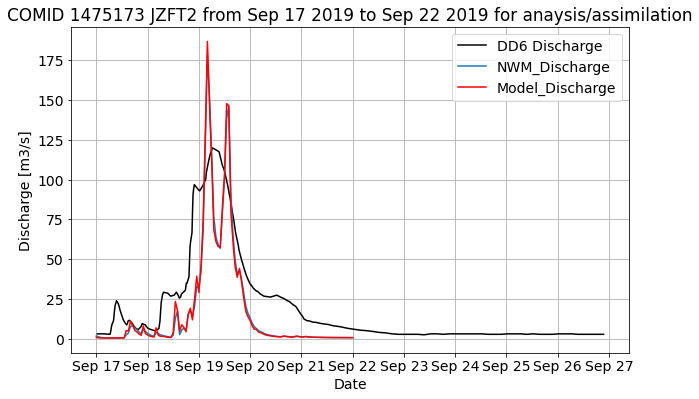

In [83]:
# Interpolation to convert DD6 stage to discharge

from scipy.interpolate import interp1d
import matplotlib.dates as mdates


# Get the interpolated discharge from rating curves

gauge_name = 'JZFT2'
stage_difference = pd.read_csv('DD6_JZFT2.csv')
stage_difference['dd6_stage_m'] = stage_difference['value'] / 3.28084
stage_difference['interp_dd6_discharge'] = interpolate_discharge(stage_difference, rating_curves)

#Remove bias in DD6 data

stage_difference['interp_dd6_discharge'] = stage_difference['interp_dd6_discharge']
stage_difference['timestamp']=pd.to_datetime(stage_difference['timestamp'])

  # drop meaningless columns
# discharge_difference = discharge_difference.drop(columns=['Unnamed: 0'])

    # drop duplicate rows
# discharge_difference = discharge_difference.drop_duplicates()

    # save as csv
stage_difference.to_csv(r'D:/Sujana/Project/ce397/DD6_stage_with_discharge.csv', index=False)


# nwm_discharge = pd.read_csv('Total_Discharge_nwm.csv')
nwm_discharge = pd.read_csv('D:/Sujana/Project/ce397/time_interval_15min/15min_flow.csv')
nwm_discharge['Time']=pd.to_datetime(nwm_discharge['Time'])


  # Plotting discharge-time series
plt.figure(facecolor='white')
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(10, 6))
  # time = discharge_difference['Time']
  # print (time)
ax.plot(stage_difference['timestamp'], stage_difference['interp_dd6_discharge'],color='k', label='DD6 Discharge')
ax.plot(nwm_discharge['Time'], nwm_discharge['Outflow1_15min'],color='tab:blue', label='NWM_Discharge')
ax.plot(nwm_discharge['Time'], result[1:,3],color='r', label='Model_Discharge')


ax.set(xlabel='Date',
      ylabel='Discharge [m3/s]',
      title=f'COMID {comid} {gauge_name} from ' \
      f'{pd.to_datetime(begindate).strftime("%b %d %Y")} to ' \
      f'{pd.to_datetime(enddate).strftime("%b %d %Y")} for anaysis/assimilation')
date_form = DateFormatter("%b %d")
ax.xaxis.set_major_formatter(date_form)
ax.legend()
ax.grid(True)
plt.savefig('D:/Sujana/Project/ce397/time_interval_15min/Discharge_graph_analysis_an.jpg')


Finding the equivalent DD6 data for the Model data

In [84]:
def get_location(ref_data,req_data):
    index = ref_data.index.get_loc(req_data,method='nearest')
    return index

In [85]:
for i in range(0,1):
    gauge_name = 'JZFT2'
    dd6_data = pd.read_csv('D:/Sujana/Project/ce397/DD6_stage_with_discharge.csv')
    model_data = pd.read_csv('time_interval_15min/15min_modelflow.csv')
    
    model_data['Time']=pd.to_datetime(model_data['Time'],utc=True)
    dd6_data['timestamp']=pd.to_datetime(dd6_data['timestamp'],utc=True)
    dd6_data = dd6_data.set_index('timestamp')
    model_data = model_data.set_index('Time') 

    # getting the list of indexes in nwm data that is closet to each dd6_data
    indx_list = [get_location(dd6_data,x) for x in model_data.index]
#   assigning the filtered indexes to the nwm_discharge
    nwm_discharge_filtered = dd6_data.iloc[indx_list]
    nwm_discharge_filtered['Date']=model_data.index
    nwm_discharge_filtered = nwm_discharge_filtered.reset_index()

    sensor = pd.DataFrame()
    sensor['Time'] = nwm_discharge_filtered['Date']
    sensor['DD6_stage(m)'] = nwm_discharge_filtered['dd6_stage_m']
    sensor['DD6_discharge'] = nwm_discharge_filtered['interp_dd6_discharge']#-133.3
    sensor.to_csv('D:/Sujana/Project/ce397/time_interval_15min/DD6_sensor_15min.csv')


C:\Software\Anaconda\Temp/ipykernel_331616/1227848018.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nwm_discharge_filtered['Date']=model_data.index


In [125]:
#Load the sensor data and model data

sensor = pd.read_csv('D:/Sujana/Project/ce397/time_interval_15min/DD6_sensor_15min.csv')
Y = np.array(sensor['DD6_discharge'])
X = pd.read_csv('D:/Sujana/Project/ce397/time_interval_15min/15min_modelflow.csv')
I1 = np.array(X['Model_I1'])
I2 = np.array(X['Model_I2'])
I3 = np.array(X['Model_I3'])
O1 = np.array(X['Model_O1'])
O2 = np.array(X['Model_O2'])
O3 = np.array(X['Model_O3'])
C = np.array([1/4,0,0,3/4,0,0]).reshape(1,6)

#Define noise parameters
sigma_v = 0.05         # Measurement noise std. dev
sigma_w = 0.2         # Process noise std. dev
add_v = 0               # Add measurement noise by setting to 1
add_w = 0               # Add process noise by setting to 1
# Y += add_v * sigma_v * np.random.randn(*Y.shape)    # Add noise to observations



In [126]:
A = np.block([[B_I,X_I],[B_O,X_O]])
B = np.block([[P_I],[P_O]])
V = sigma_v**2 * np.eye(len(C))    # Measurement noise covariance
W = sigma_w**2 * np.eye(len(A))    # Process noise covariance
S = 1e-2 * np.eye(len(A))          # Initial estimate of error covariance
x_hat = np.zeros(6).reshape(1,6)   # Estimate of initial state
# X_hat = [x_hat]


for k in range(len(I1)):
    y = Y[k]
    u = np.array([[P1[k]],[P2[k]],[P3[k]]])
    # u += add_w * sigma_w * np.random.randn(B.shape)
    S = mat_6x6 @ (S - S @ C.T @ np.linalg.inv(C @ S @ C.T + V) @ C @ S) @ mat_6x6.T + W
    # L = mat_6x6 @ S @ C.T @ np.linalg.inv(C @ S @ C.T + V)
    L = S @ C.T @ np.linalg.inv(C @ S @ C.T + V)
    y_hat = C @ (mat_6x6 @ x_hat[-1,:].reshape(6,1) + mat_6x3 @ u)
    x = mat_6x6 @ x_hat[-1,:].reshape(6,1) + mat_6x3 @ u + L @ (y - y_hat)
    x = x.reshape(1,6)
    x_hat = np.concatenate((x_hat,x),axis=0)
X_hat = x_hat


<Figure size 432x288 with 0 Axes>

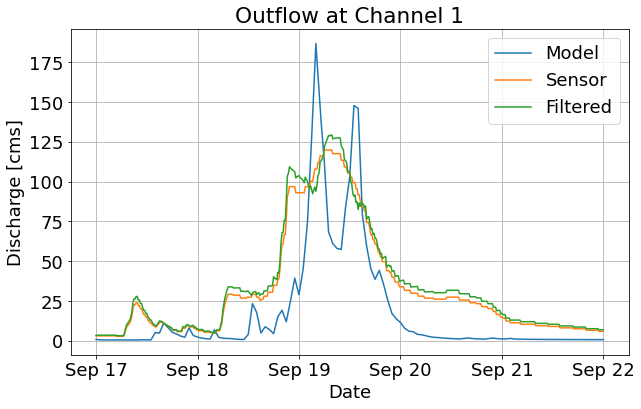

<Figure size 432x288 with 0 Axes>

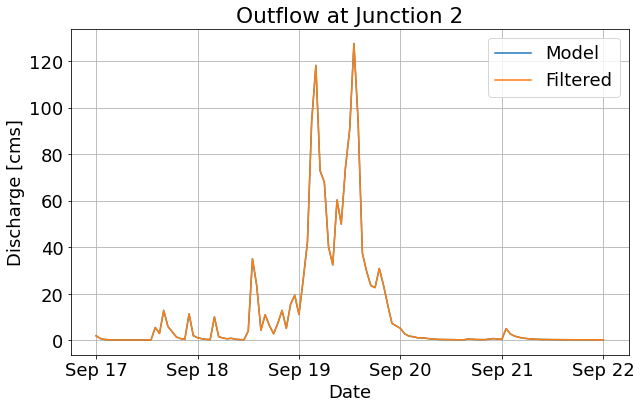

<Figure size 432x288 with 0 Axes>

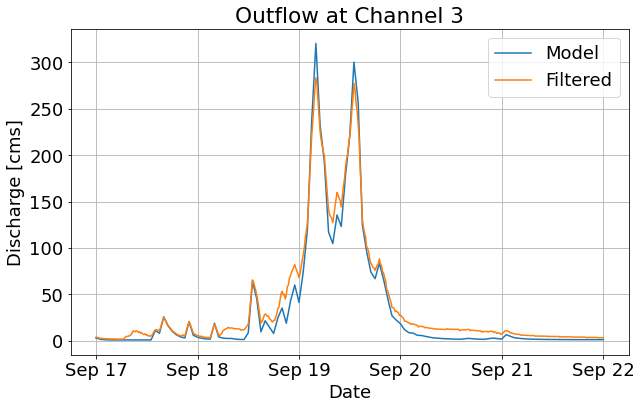

In [131]:
# plot the discharge time series

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
time= pd.to_datetime(time)

# Outflow1
plt.figure(facecolor='white')
plt.rc('font', size=18)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(time, O1, label='Model')
ax.plot(time, Y, label='Sensor')
ax.plot(time, X_hat[1:,3], label='Filtered')
ax.set(xlabel='Date',
       ylabel='Discharge [cms]',
       title='Outflow at Channel 1')
date_form = DateFormatter("%b %d")
ax.xaxis.set_major_formatter(date_form)
ax.legend()
ax.grid(True)
# plt.show()
plt.savefig('time_interval_15min/outflow1_an.jpg')

#Outflow 2
plt.figure(facecolor='white')
plt.rc('font', size=18)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(time, O2, label='Model')
ax.plot(time, X_hat[1:,4], label='Filtered')
# ax.plot(time, Y, label='Sensor')
ax.set(xlabel='Date',
       ylabel='Discharge [cms]',
       title='Outflow at channel 2')
date_form = DateFormatter("%b %d")
ax.xaxis.set_major_formatter(date_form)
ax.legend()
ax.grid(True)
# plt.show()
plt.savefig('time_interval_15min/outflow2_an.jpg')

#Outflow 3
plt.figure(facecolor='white')
plt.rc('font', size=18)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(time, O3, label='Model')
ax.plot(time, X_hat[1:,5], label='Filtered')
# ax.plot(time, Y, label='Sensor')
ax.set(xlabel='Date',
       ylabel='Discharge [cms]',
       title='Outflow at Channel 3')
date_form = DateFormatter("%b %d")
ax.xaxis.set_major_formatter(date_form)
ax.legend()
ax.grid(True)
# plt.show()
plt.savefig('time_interval_15min/outflow3_an.jpg')

